In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2 

In [2]:
%matplotlib inline

In [3]:
plt.style.use('dark_background')

In [26]:
path = r'C:\Users\Ron\Desktop\Physics stuff\AY 2022-2023\AP157\low contrast pics' 
gray = '\yutaka takanashi towards the city.jpg' 
color = '\minecraft raytracing cave.png'
fade = '\\faded victorian.jpg'
room = '\c0all.jpeg'
victorian = mpimg.imread(path+fade)
cave = mpimg.imread(path+color) 
room = mpimg.imread(path+room)

# Contrast Stretch

In [5]:
#Normalizes any given array from range [a,b] to an array with range [c,d], where a<b and c<d. It is assumed that the domain of the input array lies in [a,b].
def normalizer(array, a, b, c, d): 
    result = (1/(b-a))*((d-c)*array + (b*c - a*d))
    result[result<c] = c #Clip lower values to c
    result[result>d] = d #Clip lower values to d
    return result

def RGB_contrast_stretch(img, low, high):
    img = img[:,:,0:3] #Select the RGB channels only.
    I_min = np.array([np.percentile(img[:,:,i], low[i]) for i in range(len(low))])
    I_max = np.array([np.percentile(img[:,:,i], high[i]) for i in range(len(high))]) 
    new_img = (img - I_min)*255/(I_max - I_min)
    new_img[new_img<0] = 0 #clip those pixels below I_min
    new_img[new_img>255] = 255 #clip those pixels below I_max
    processed = np.array(new_img, dtype='uint8')
    return processed

def gray_contrast_stretch(img, low, high): 
    I_min = np.percentile(img, low)
    I_max = np.percentile(img, high) 
    new_img = (img - I_min)*255/(I_max - I_min)
    new_img[new_img<0] = 0 #clip those pixels below I_min
    new_img[new_img>255] = 255 #clip those pixels below I_max
    processed = np.array(new_img, dtype='uint8')
    return processed
    
def RGB_histogram_plotter(img_old, new_img): 
    rold, gold, bold = img_old[...,0].flatten(), img_old[...,1].flatten(), img_old[...,2].flatten() 
    Rold, Gold, Bold = new_img[...,0].flatten(), new_img[...,1].flatten(), new_img[...,2].flatten() 
    fig, ax = plt.subplots(3, 2, figsize=(15,15))
    ax = ax.flatten() 
    for i, col, old, new in zip([0,1,2], ['r','g','b'], [rold, gold, bold], [Rold, Gold, Bold]):
        ax[2*i].hist(old, 256, [0,255], color=col)
        ax[2*i].set_xlim([0,256])
        ax[2*i+1].hist(new, 256, [0,255], color=col)
        ax[2*i+1].set_xlim([0,256])
    ax[0].set_title('Old') 
    ax[1].set_title('New')


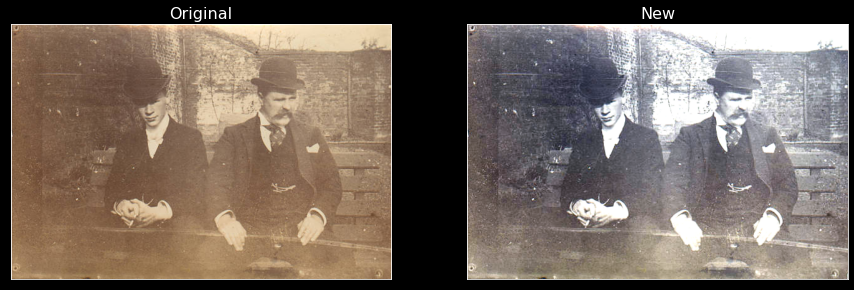

In [6]:
victorian_new = RGB_contrast_stretch(victorian, [0,0,0], [90,90,90])
fig, ax = plt.subplots(1,2, figsize=(15,5))
victorians=[victorian, victorian_new]
for i in range(2):
    ax[i].imshow(victorians[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[0].set_title('Original', fontsize=16)
ax[1].set_title('New', fontsize=16) 
plt.savefig('rgb_contrast_stretch1.png',dpi=300)

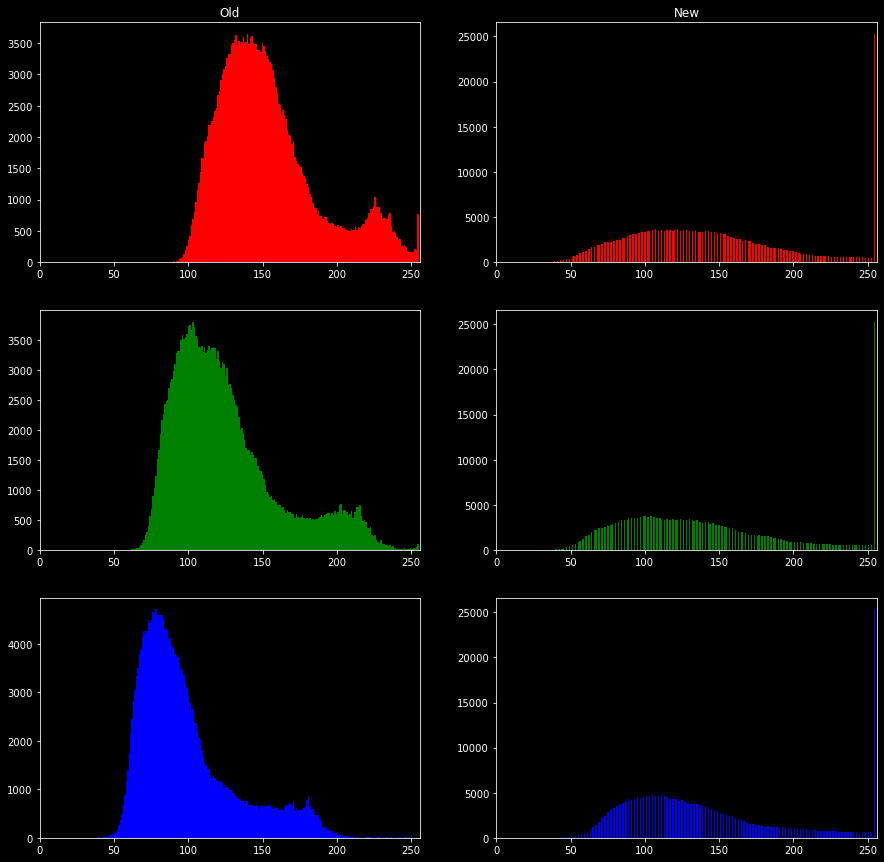

In [93]:
RGB_histogram_plotter(victorian, victorian_new) 
plt.savefig('rgb_contrast_stretch2.png',dpi=300)

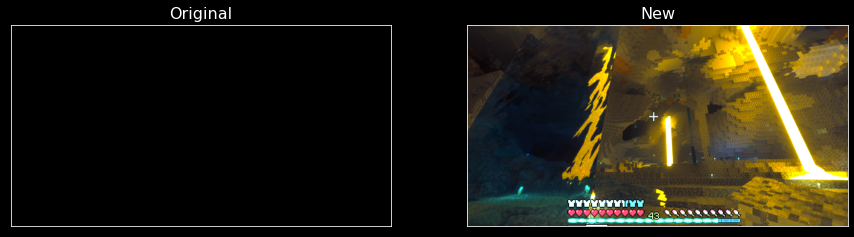

In [8]:
cave_new = RGB_contrast_stretch(cave, [0,0,0], [94,95,96])
fig, ax = plt.subplots(1,2, figsize=(15,5))
cave = np.array(cave, dtype='int')
caves=[cave, cave_new]
for i in range(2):
    ax[i].imshow(caves[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[0].set_title('Original', fontsize=16)
ax[1].set_title('New', fontsize=16) 
plt.savefig('rgb_contrast_stretch3.png',dpi=300)

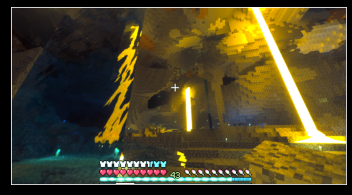

In [11]:
plt.imshow(cave_new) 
plt.xticks([])
plt.yticks([])
plt.savefig('cave_rgbstretched.png', dpi=300)

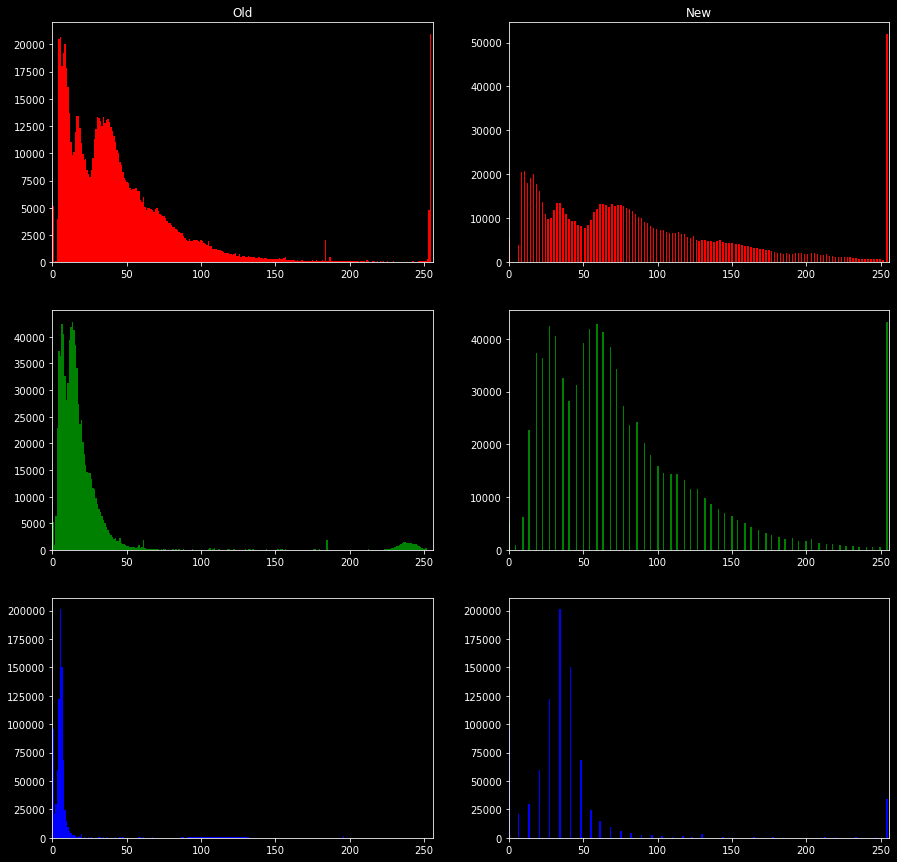

In [13]:
cave = mpimg.imread(path+color)
cave=cave[:,:,0:3]*255
RGB_histogram_plotter(cave, cave_new) 
plt.savefig('rgb_contrast_stretch4.png',dpi=300)

# Gray World, with value clipping

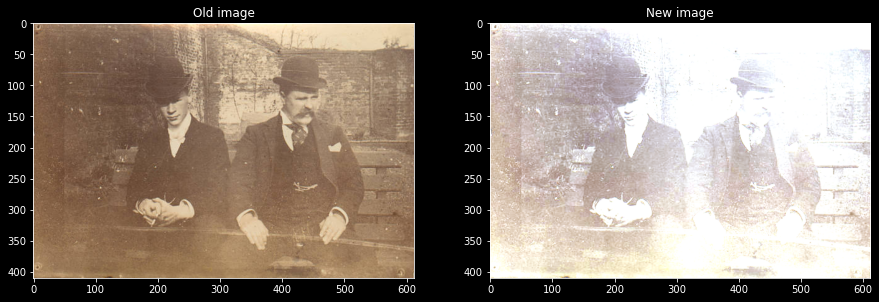

In [30]:
def gray_world1(img): #Values below and above 255 are clipped.
    Rave, Gave, Bave = img.mean(axis=(0,1))[:3]
    new = np.copy(img)
    new = np.array(new, dtype='float')
    new[...,0], new[...,1], new[...,2] = img[...,0]/Rave, img[...,1]/Gave, img[...,2]/Bave 
    new[...,:]= new[...,:]*255 
    new[new>255] = 255
    return np.array(new, dtype='uint8')  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15)) 
ax1.imshow(victorian)
ax1.set_title('Old image')
victorian_img3 = gray_world1(victorian)
ax2.imshow(victorian_img3)
ax2.set_title('New image')

plt.savefig('victorian_grayworld1.png', dpi=300)

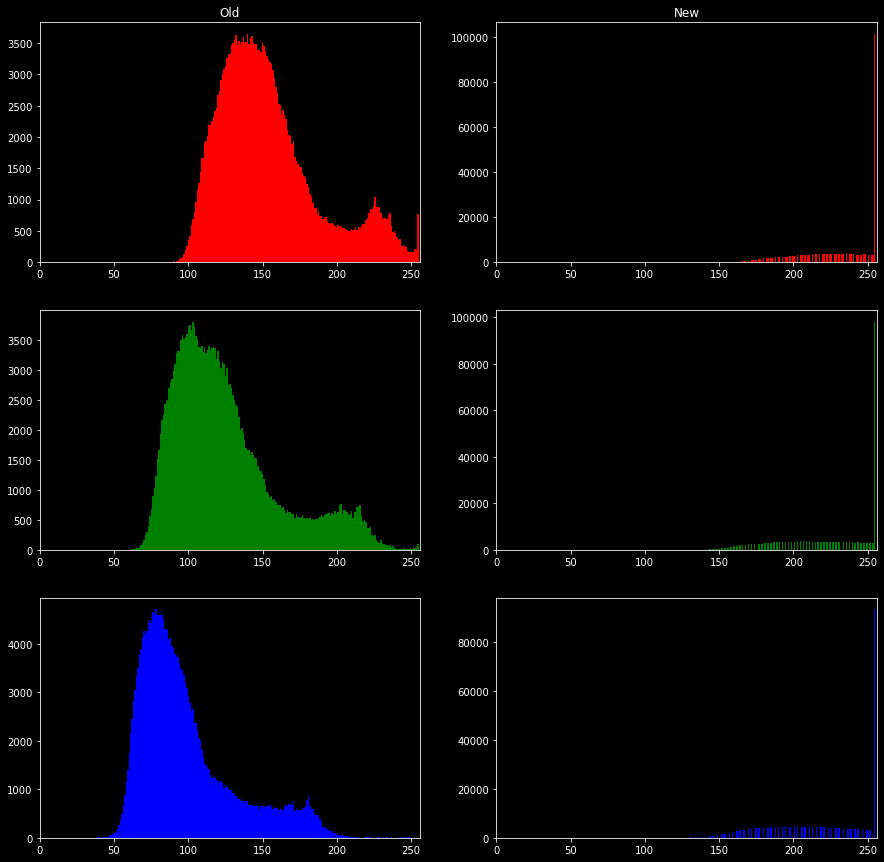

In [98]:
RGB_histogram_plotter(victorian, victorian_img3)
plt.savefig('victorian_grayworld_hist1.png', dpi=300)

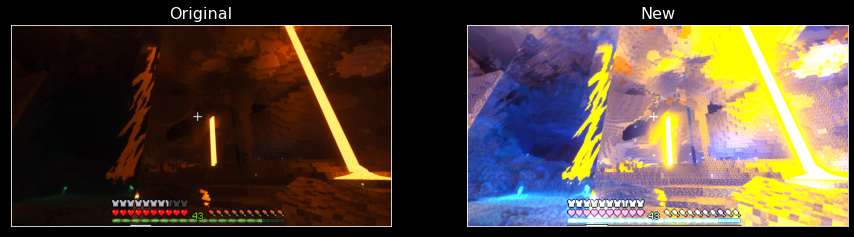

In [99]:
cave_new = gray_world1(cave)
fig, ax = plt.subplots(1,2, figsize=(15,5))
cave = np.array(cave, dtype='int')
caves=[cave, cave_new]
for i in range(2):
    ax[i].imshow(caves[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[0].set_title('Original', fontsize=16)
ax[1].set_title('New', fontsize=16) 
plt.savefig('cave_grayworld1.png',dpi=300)

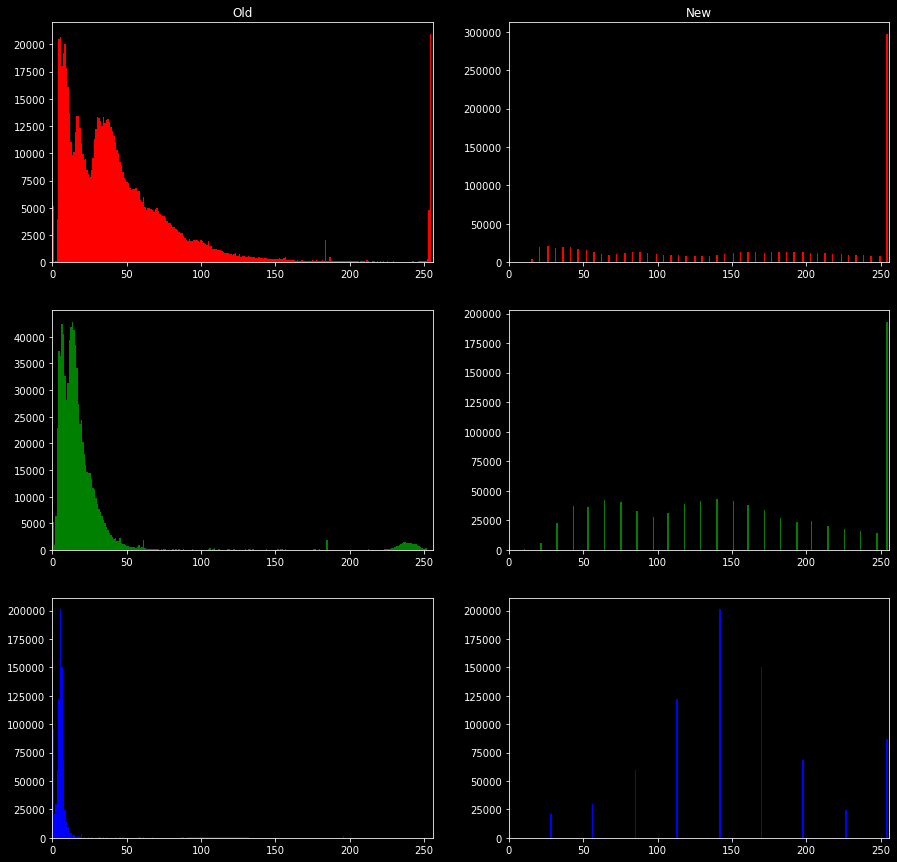

In [100]:
RGB_histogram_plotter(cave, gray_world1(cave))
plt.savefig('cave_grayworld_hist1.png', dpi=300) 

# Gray World, without value clipping

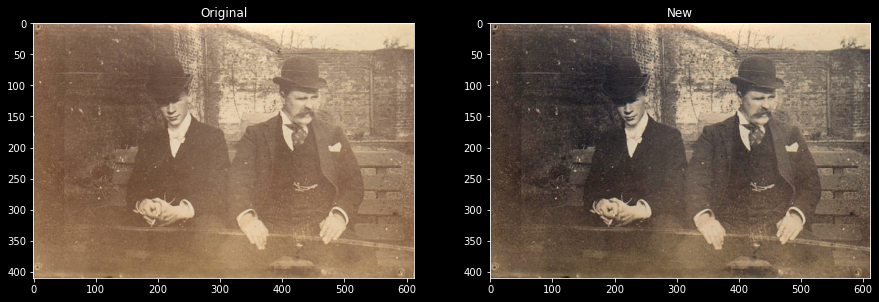

In [101]:
def gray_world(img): #Values below and above 255 aren't clipped; rather, the resulting array is normalized to 0 to 255.
    Rave, Gave, Bave = img.mean(axis=(0,1))[:3]
    new = np.copy(img)
    new = np.array(new, dtype='float')
    new[...,0], new[...,1], new[...,2] = img[...,0]/Rave, img[...,1]/Gave, img[...,2]/Bave 
    for i in range(3):
        new[...,i] = normalizer(new[...,i], np.min(new[...,i]), np.max(new[...,i]), 0, 255)
    return np.array(new, dtype='uint8')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15)) 
ax1.imshow(victorian)
ax1.set_title('Original')
victorian_img4 = gray_world(victorian)
ax2.imshow(victorian_img4)
ax2.set_title('New')

plt.savefig('victorian_grayworld.png', dpi=300)



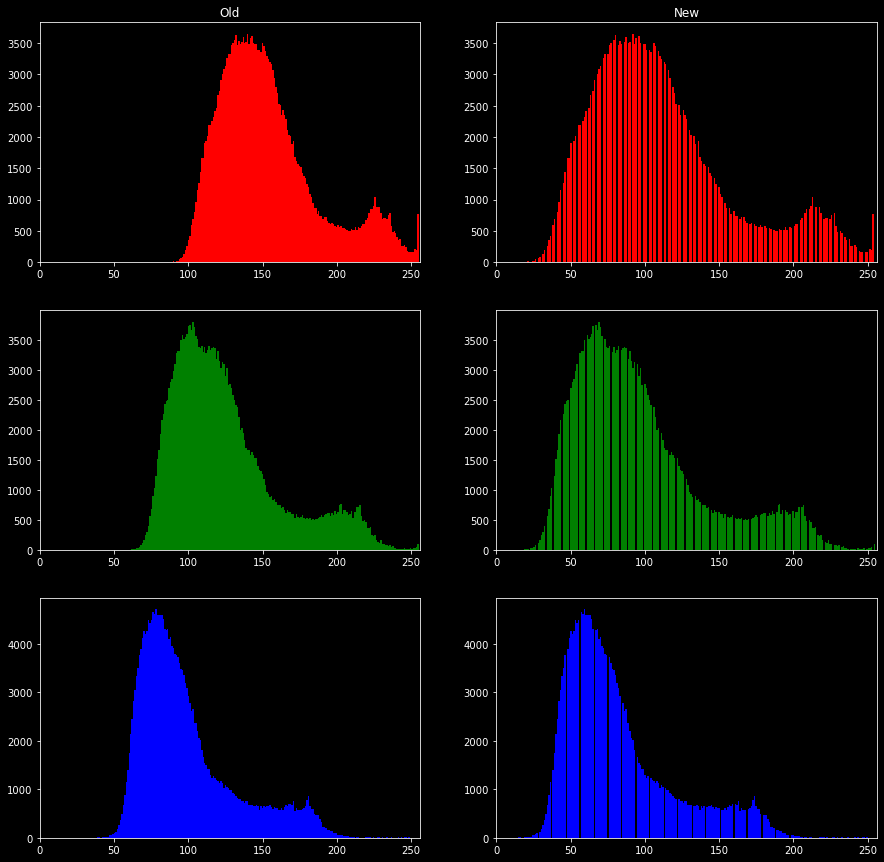

In [102]:
RGB_histogram_plotter(victorian, victorian_img4) 
plt.savefig('victorian_grayworld_hist.png', dpi=300) 

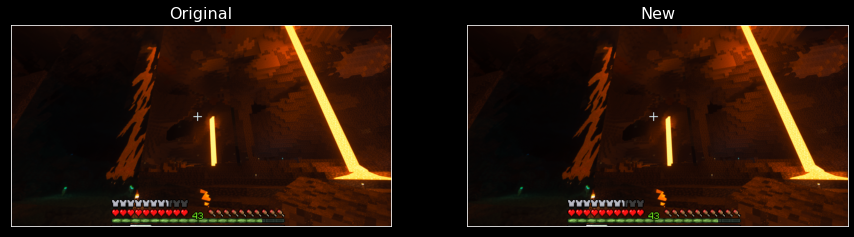

In [103]:
cave_new = gray_world(cave)
fig, ax = plt.subplots(1,2, figsize=(15,5))
cave = np.array(cave, dtype='int')
caves=[cave, cave_new]
for i in range(2):
    ax[i].imshow(caves[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[0].set_title('Original', fontsize=16)
ax[1].set_title('New', fontsize=16) 
plt.savefig('cave_grayworld.png',dpi=300)

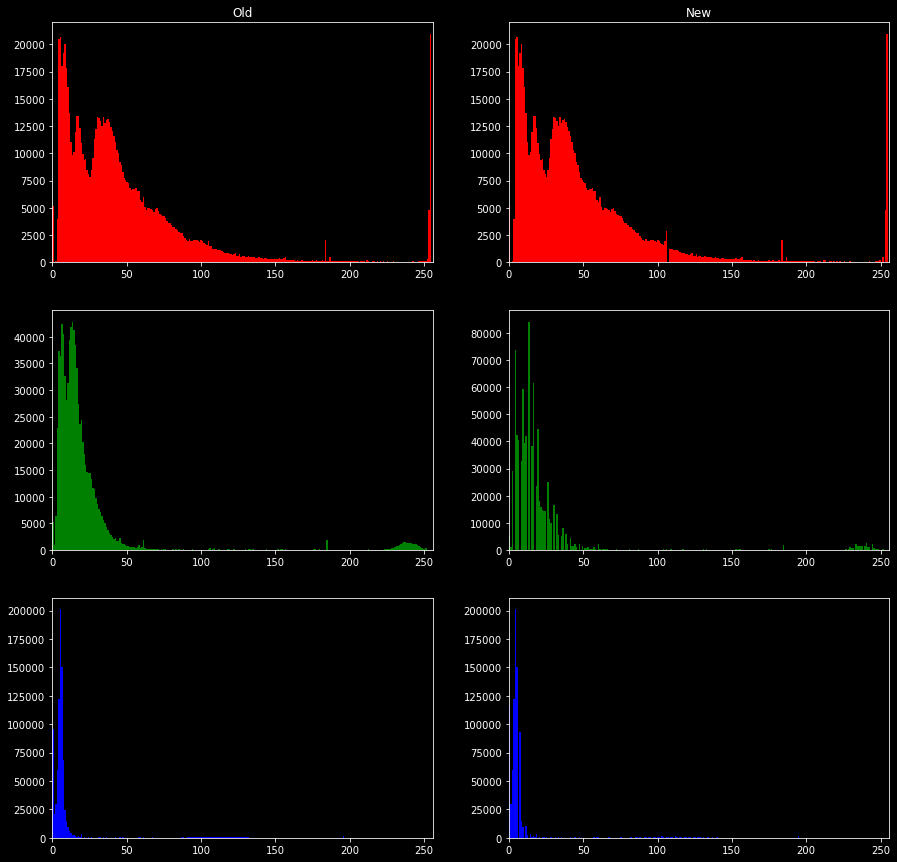

In [104]:
RGB_histogram_plotter(cave, gray_world(cave))
plt.savefig('cave_grayworld_hist.png', dpi=300)

# White Patch

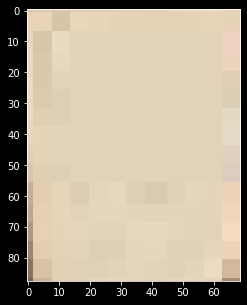

In [21]:
filename = '\white patch.png'
white_patch = mpimg.imread(path+filename) 
plt.figure(figsize=(5,5))
plt.imshow(white_patch)  


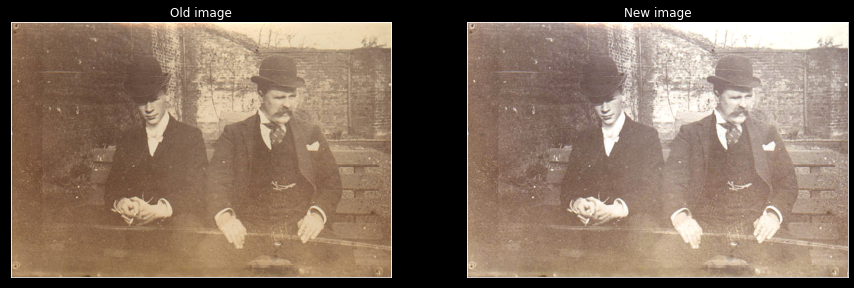

In [22]:
def whitePatch(img, patch):
    patch = np.array(patch[:,:,0:3]*255, dtype='int')
    Rave, Gave, Bave = patch.mean(axis=(0,1))[:3]
    new = np.copy(img)
    new = np.array(new, dtype='float')
    new[...,0], new[...,1], new[...,2] = img[...,0]/Rave, img[...,1]/Gave, img[...,2]/Bave 
    new[...,:]= new[...,:]*255 
    new[new>255] = 255
    return np.array(new, dtype='uint8')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 
ax1.imshow(victorian)
ax1.set_title('Old image')
ax1.set_xticks([]) 
ax1.set_yticks([]) 
victorian_whitePatch = whitePatch(victorian, white_patch)
ax2.imshow(victorian_whitePatch)
ax2.set_title('New image')
ax2.set_xticks([]) 
ax2.set_yticks([]) 

plt.savefig('victorian_whitepatch.png', dpi=300)



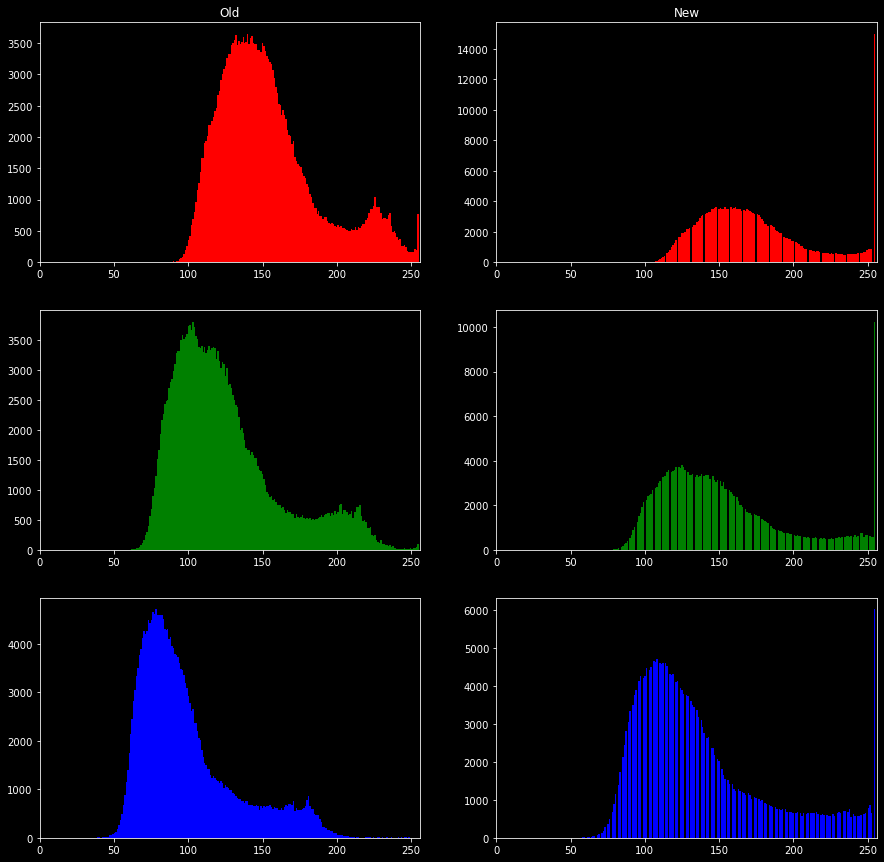

In [107]:
RGB_histogram_plotter(victorian, victorian_whitePatch)
plt.savefig('victorian_whitepatch_hist.png', dpi=300)

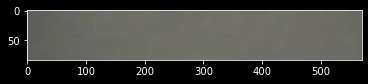

In [23]:
white_patch_room = mpimg.imread(path+'\white patch1.png')
plt.imshow(white_patch_room)

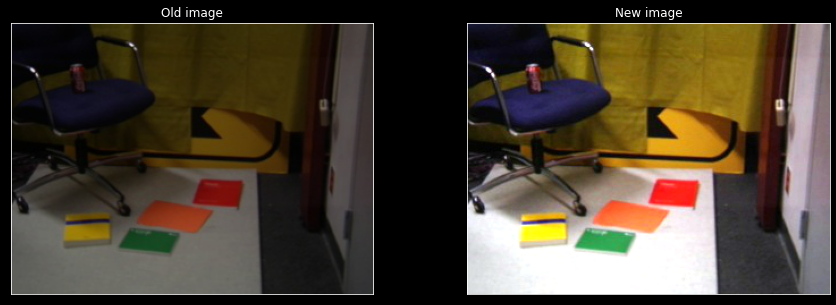

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5)) 
ax1.imshow(room)
ax1.set_title('Old image')
ax1.set_xticks([]) 
ax1.set_yticks([]) 
room_whitePatch = whitePatch(room, white_patch_room)
ax2.imshow(room_whitePatch)
ax2.set_title('New image')
ax2.set_xticks([]) 
ax2.set_yticks([]) 

plt.savefig('room_whitepatch.png', dpi=300)

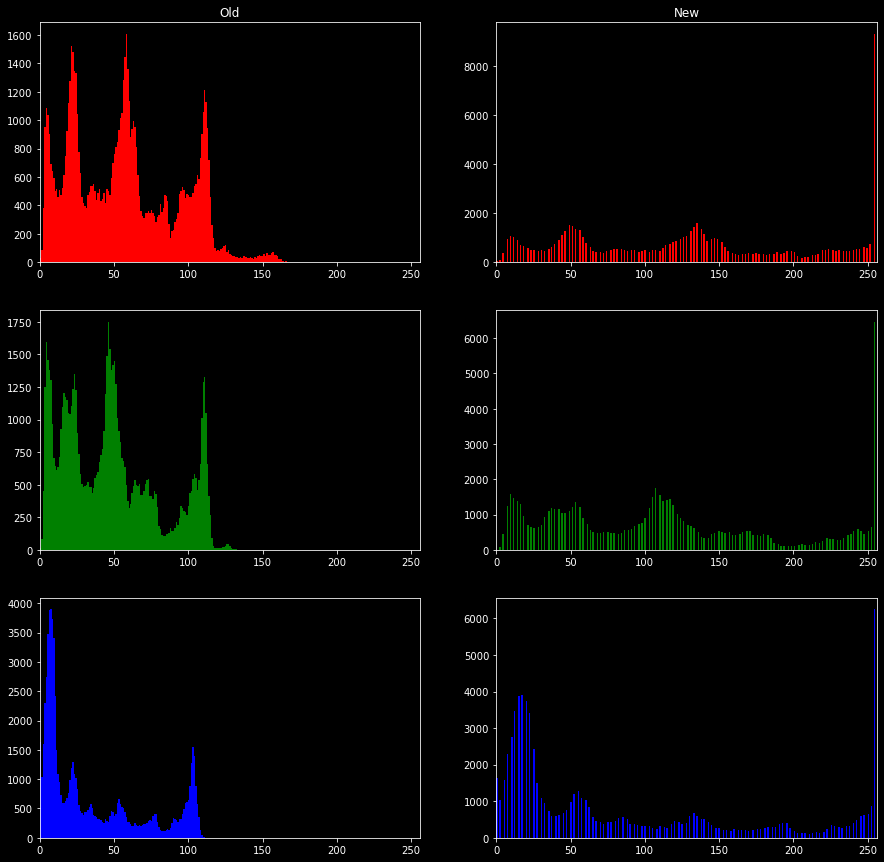

In [28]:
RGB_histogram_plotter(room, room_whitePatch)
plt.savefig('room_whitepatchHist.png', dpi=300)